<a href="https://colab.research.google.com/github/andresvc21/Random_Practice_ML/blob/main/Homework_M5_Autoencoder_Andres_Villegas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##INTRO




### Directives
* Create the autoencoders described below, you can play with the topology, those are just starting points
* Use GPU runtime
* Print 10 inputs and their associated outputs
* Don't forget to normalize your data
* Use the Functional API for Keras

### Autoencoders to build
1. Stacked 784 - 392 - 196 - 392 - 784 (tied weights)
2. Convolutional Encoder (conv, maxpool, conv, maxpool, conv, maxpool). Decoder (conv, upsample2d, conv, upsample2d, conv, upsample2d, conv)


In [2]:
# Choose Python 3 runtime
!pip install --upgrade tensorflow

     |████████████████████████████████| 462 kB 12.3 MB/s 


In [1]:
#Required libraries

from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

(X_train, _), (X_test, _) = mnist.load_data()
all_data = np.concatenate((X_train, X_test))
all_data.shape

11501568/11490434 [==============================] - 0s 0us/step


(70000, 28, 28)

#Explore Data


In [3]:
def print_first_9(data):
  fig = plt.figure()
  for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(data[i], interpolation='none')
    plt.title("Digit: {}".format(i))
    plt.xticks([])
    plt.yticks([])

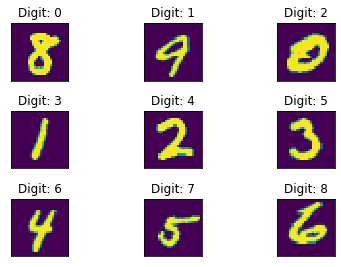

In [4]:
print_first_9(all_data[-9:])

#Normalize


In [7]:
max_value = float(X_train.max())
X_Train = X_train.astype(np.float32) / max_value
X_Test = X_test.astype(np.float32) / max_value

In [10]:
#We need a validation split
print(X_Train.shape)

X_train, X_valid = X_Train[:-10000], X_Train[-10000:]
X_train.shape, X_valid.shape

(60000, 28, 28)


((50000, 28, 28), (10000, 28, 28))

#Function Display


In [12]:
#Displays the original images and their reconstructions
def plot_image(image):
  plt.imshow(image, cmap="binary")
  plt.axis("off")

def show_reconstructions(model, images=X_valid, n_images=10):
  reconstructions = model.predict(images[:n_images])
  fig = plt.figure(figsize=(n_images * 1.5, 3))
  for image_index in range(n_images):
     plt.subplot(2, n_images, 1 + image_index)
     plot_image(images[image_index])
     plt.subplot(2, n_images, 1 + n_images + image_index)
     plot_image(reconstructions[image_index])

#Architecture

In [ ]:
#Encoder
inputs = keras.Input(shape=(28,28))
lr_flatten = keras.layers.Flatten()(inputs)
lr1 = keras.layers.Dense(392, activation="selu")(lr_flatten)
lr2 = keras.layers.Dense(196, activation="selu")(lr1)

#Decoder
lr3 =  keras.layers.Dense(392, activation="selu")(lr2)
lr4 =  keras.layers.Dense(28 * 28, activation="sigmoid")(lr3)
outputs = keras.layers.Reshape([28, 28])(lr4)
stacked_ae = keras.models.Model(inputs,outputs)
stacked_ae.compile(loss="binary_crossentropy",optimizer=keras.optimizers.SGD(lr=1.5))
stacked_ae.summary()